<a href="https://colab.research.google.com/github/JordiCorbilla/ocular-disease-intelligent-recognition-deep-learning/blob/master/odir_inception_v3_training_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# odir inception_v3 training basic

In [59]:
# Imports
import os
import tensorflow as tf
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.python.keras.optimizer_v1 import SGD

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import secrets
import odir
from odir_advance_plotting import Plotter
from odir_kappa_score import FinalScore
from odir_predictions_writer import Prediction
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from sklearn.utils import class_weight
import numpy as np

In [60]:
# main parameters
batch_size = 32
num_classes = 8
epochs = 100
patience = 5

In [61]:
# Create test run folder where to store the details of the run
token = secrets.token_hex(16)
folder = r'test_run'
new_folder = os.path.join(folder, token)

if not os.path.exists(new_folder):
    os.makedirs(new_folder) 

In [62]:
# Base Model definition for Inception V3
base_model = inception_v3.InceptionV3
base_model = base_model(weights='imagenet', include_top=False)   

In [63]:
# Model summary
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_376 (Conv2D)            (None, None, None,   864         ['input_5[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_376 (Batch  (None, None, None,   96         ['conv2d_376[0][0]']             
 Normalization)                 32)                                                         

                                                                                                  
 average_pooling2d_36 (AverageP  (None, None, None,   0          ['max_pooling2d_17[0][0]']       
 ooling2D)                      192)                                                              
                                                                                                  
 conv2d_381 (Conv2D)            (None, None, None,   12288       ['max_pooling2d_17[0][0]']       
                                64)                                                               
                                                                                                  
 conv2d_383 (Conv2D)            (None, None, None,   76800       ['activation_382[0][0]']         
                                64)                                                               
                                                                                                  
 conv2d_38

                                                                                                  
 conv2d_394 (Conv2D)            (None, None, None,   16384       ['average_pooling2d_37[0][0]']   
                                64)                                                               
                                                                                                  
 batch_normalization_388 (Batch  (None, None, None,   192        ['conv2d_388[0][0]']             
 Normalization)                 64)                                                               
                                                                                                  
 batch_normalization_390 (Batch  (None, None, None,   192        ['conv2d_390[0][0]']             
 Normalization)                 64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_401 (Batch  (None, None, None,   192        ['conv2d_401[0][0]']             
 Normalization)                 64)                                                               
                                                                                                  
 activation_395 (Activation)    (None, None, None,   0           ['batch_normalization_395[0][0]']
                                64)                                                               
                                                                                                  
 activation_397 (Activation)    (None, None, None,   0           ['batch_normalization_397[0][0]']
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_412 (Conv2D)            (None, None, None,   114688      ['activation_411[0][0]']         
                                128)                                                              
                                                                                                  
 batch_normalization_407 (Batch  (None, None, None,   384        ['conv2d_407[0][0]']             
 Normalization)                 128)                                                              
                                                                                                  
 batch_normalization_412 (Batch  (None, None, None,   384        ['conv2d_412[0][0]']             
 Normalization)                 128)                                                              
          

 Normalization)                 160)                                                              
                                                                                                  
 activation_420 (Activation)    (None, None, None,   0           ['batch_normalization_420[0][0]']
                                160)                                                              
                                                                                                  
 conv2d_421 (Conv2D)            (None, None, None,   179200      ['activation_420[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_421 (Batch  (None, None, None,   480        ['conv2d_421[0][0]']             
 Normalization)                 160)                                                              
          

 activation_424 (Activation)    (None, None, None,   0           ['batch_normalization_424[0][0]']
                                192)                                                              
                                                                                                  
 activation_425 (Activation)    (None, None, None,   0           ['batch_normalization_425[0][0]']
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_416[0][0]',         
                                768)                              'activation_419[0][0]',         
                                                                  'activation_424[0][0]',         
                                                                  'activation_425[0][0]']         
          

 batch_normalization_429 (Batch  (None, None, None,   576        ['conv2d_429[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_434 (Batch  (None, None, None,   576        ['conv2d_434[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_435 (Batch  (None, None, None,   576        ['conv2d_435[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_426 (Activation)    (None, None, None,   0           ['batch_normalization_426[0][0]']
          

 conv2d_436 (Conv2D)            (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_439 (Conv2D)            (None, None, None,   258048      ['activation_438[0][0]']         
                                192)                                                              
                                                                                                  
 conv2d_444 (Conv2D)            (None, None, None,   258048      ['activation_443[0][0]']         
                                192)                                                              
                                                                                                  
 conv2d_445 (Conv2D)            (None, None, None,   147456      ['average_pooling2d_42[0][0]']   
          

 batch_normalization_447 (Batch  (None, None, None,   960        ['conv2d_447[0][0]']             
 Normalization)                 320)                                                              
                                                                                                  
 batch_normalization_451 (Batch  (None, None, None,   576        ['conv2d_451[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_447 (Activation)    (None, None, None,   0           ['batch_normalization_447[0][0]']
                                320)                                                              
                                                                                                  
 activation_451 (Activation)    (None, None, None,   0           ['batch_normalization_451[0][0]']
          

                                384)                                                              
                                                                                                  
 activation_455 (Activation)    (None, None, None,   0           ['batch_normalization_455[0][0]']
                                384)                                                              
                                                                                                  
 activation_458 (Activation)    (None, None, None,   0           ['batch_normalization_458[0][0]']
                                384)                                                              
                                                                                                  
 activation_459 (Activation)    (None, None, None,   0           ['batch_normalization_459[0][0]']
                                384)                                                              
          

 Normalization)                 384)                                                              
                                                                                                  
 batch_normalization_468 (Batch  (None, None, None,   1152       ['conv2d_468[0][0]']             
 Normalization)                 384)                                                              
                                                                                                  
 conv2d_469 (Conv2D)            (None, None, None,   393216      ['average_pooling2d_44[0][0]']   
                                192)                                                              
                                                                                                  
 batch_normalization_461 (Batch  (None, None, None,   960        ['conv2d_461[0][0]']             
 Normalization)                 320)                                                              
          

In [64]:
# Plot the model
tf.keras.utils.plot_model(model, to_file=os.path.join(new_folder, 'model_inception_v3.png'), show_shapes=True, show_layer_names=True)

In [65]:
# metrics
defined_metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
]

In [66]:
# SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
print('Configuration Start -------------------------')
print(sgd.get_config())
print('Configuration End -------------------------')
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=defined_metrics)

Configuration Start -------------------------
{'name': 'SGD', 'learning_rate': 0.01, 'decay': 1e-06, 'momentum': 0.9, 'nesterov': True}
Configuration End -------------------------


In [67]:
# Train the data
(x_train, y_train), (x_test, y_test) = odir.load_data(128)

In [68]:
# Define class names
x_test_drawing = x_test

x_train = inception_v3.preprocess_input(x_train)
x_test = inception_v3.preprocess_input(x_test)

class_names = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

In [69]:
# Plot data input
plotter = Plotter(class_names)

In [70]:
# Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', verbose=1)

In [71]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
193/193 [==============================] - 45s 154ms/step - loss: 0.3107 - accuracy: 0.8623 - precision: 0.4753 - recall: 0.1997 - auc: 0.8292 - val_loss: 0.4398 - val_accuracy: 0.8394 - val_precision: 0.2092 - val_recall: 0.1025 - val_auc: 0.6197
Epoch 2/100
193/193 [==============================] - 28s 143ms/step - loss: 0.2672 - accuracy: 0.8819 - precision: 0.6236 - recall: 0.3146 - auc: 0.8826 - val_loss: 0.3329 - val_accuracy: 0.8772 - val_precision: 0.5193 - val_recall: 0.2350 - val_auc: 0.7632
Epoch 3/100
193/193 [==============================] - 28s 146ms/step - loss: 0.2415 - accuracy: 0.8933 - precision: 0.6697 - recall: 0.4125 - auc: 0.9082 - val_loss: 0.3682 - val_accuracy: 0.8628 - val_precision: 0.4235 - val_recall: 0.2700 - val_auc: 0.7520
Epoch 4/100
193/193 [==============================] - 28s 143ms/step - loss: 0.2206 - accuracy: 0.9038 - precision: 0.7064 - recall: 0.4913 - auc: 0.9256 - val_loss: 0.4021 - val_accuracy: 0.8547 - val_precision: 0.3629

In [72]:
print("saving weights")
model.save(os.path.join(new_folder, 'model_weights.h5'))

saving weights


plotting metrics


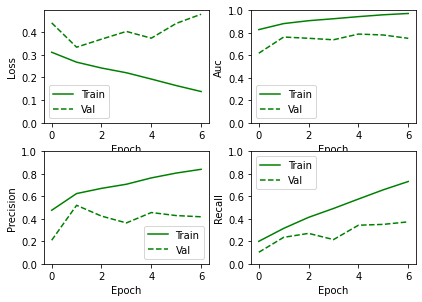

In [73]:
print("plotting metrics")
plotter.plot_metrics(history, os.path.join(new_folder, 'plot1.png'), 2)

plotting accuracy


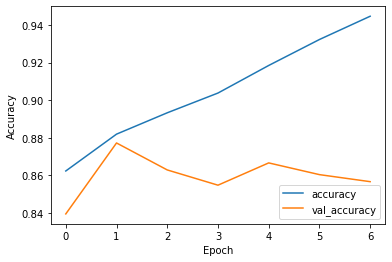

In [74]:
print("plotting accuracy")
plotter.plot_accuracy(history, os.path.join(new_folder, 'plot2.png'))

In [75]:
print("display the content of the model")
baseline_results = model.evaluate(x_test, y_test, verbose=2)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

display the content of the model
13/13 - 1s - loss: 0.4777 - accuracy: 0.8566 - precision: 0.4174 - recall: 0.3725 - auc: 0.7517 - 535ms/epoch - 41ms/step
loss :  0.47772419452667236
accuracy :  0.8565624952316284
precision :  0.41736695170402527
recall :  0.3725000023841858
auc :  0.7517110109329224



13/13 [==============================] - 4s 61ms/step
plotting confusion matrix


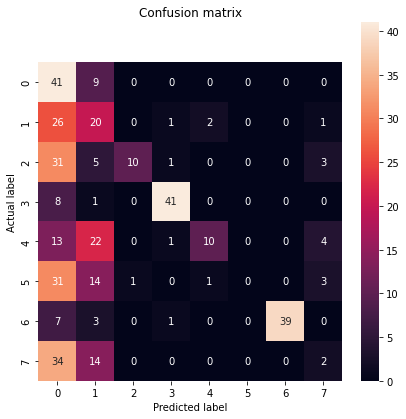

In [76]:
test_predictions_baseline = model.predict(x_test)
print("plotting confusion matrix")
plotter.plot_confusion_matrix_generic(y_test, test_predictions_baseline, os.path.join(new_folder, 'plot3.png'), 0)

In [77]:
# save the predictions
prediction_writer = Prediction(test_predictions_baseline, 400, new_folder)
prediction_writer.save()
prediction_writer.save_all(y_test)

In [78]:
# show the final score
score = FinalScore(new_folder)
score.output()

Kappa score: 0.31261699737925874
F-1 score: 0.8565625
AUC value: 0.7626616071428571
Final Score: 0.6439470348407054


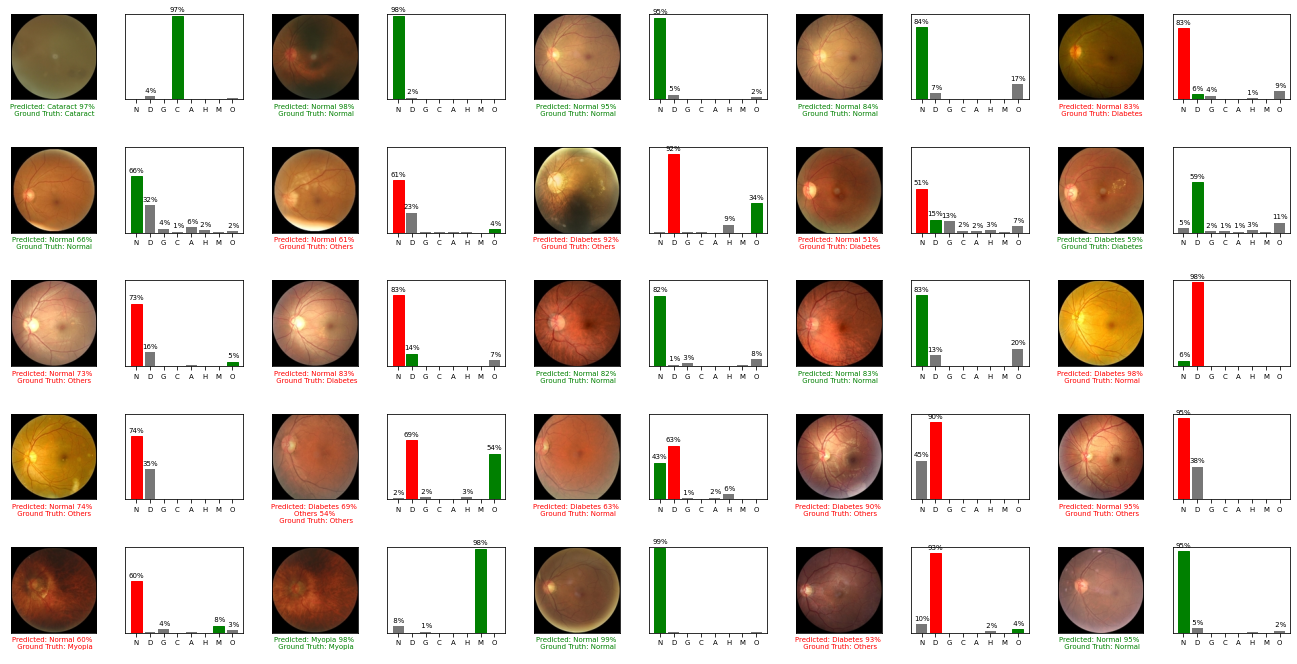

In [79]:
# plot output results
plotter.plot_output(test_predictions_baseline, y_test, x_test_drawing, os.path.join(new_folder, 'plot4.png'))